In [1]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
x_train = mnist.train.images[:55000,:]
x_train.shape

(55000, 784)

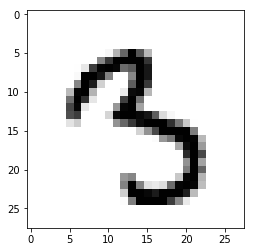

In [4]:
randomNum = random.randint(0,55000)
image = x_train[randomNum].reshape([28,28])
plt.imshow(image, cmap=plt.get_cmap('gray_r'))
plt.show()

In [5]:
def conv2d(x, W):
  return tf.nn.conv2d(input=x, filter=W, strides=[1, 1, 1, 1], padding='SAME')

def avg_pool_2x2(x):
  return tf.nn.avg_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [7]:
# DISCRIMINATOR NETWORK
def discriminatorNet(x_image, reuse = False):
    with tf.variable_scope('discriminatorNet') as scope:
        if (reuse):
            tf.get_variable_scope().reuse_variables()
            
        normalIntializer = tf.truncated_normal_initializer(stddev = 0.02)
        
        # First Convolution and Pool layer
        WConv1 = tf.get_variable('d_wconv1', [5, 5, 1, 8], initializer = normalInitializer)
        bConv1 = tf.get_variable('d_bconv1', [8], initializer=tf.constant_initializer(0))
        hConv1 = tf.nn.relu(conv2d(x_image, WConv1) + bConv1)
        hPool1 = avg_pool_2x2(hConv1)

        # First Convolution and Pool layer
        WConv2 = tf.get_variable('d_wconv2', [5, 5, 8, 16], initializer = normalInitializer)
        bConv2 = tf.get_variable('d_bconv2', [16], initializer=tf.constant_initializer(0))
        hConv2 = tf.nn.relu(conv2d(x_image, WConv1) + bConv1)
        hPool2 = avg_pool_2x2(hConv2)


        # First Fully connected layer
        WFC1 = tf.get_variable('d_wfc1', [7 * 7 * 16, 32], initializer = normalInitializer)
        bFC1 = tf.get_variable('d_bfc1', [32], initializer=tf.constant_initializer(0))
        hPool2Flat = tf.reshape(hPool2, [-1, 7*7*16])
        hFC1 = tf.nn.relu(tf.matmul(hPool2Flat, WFC1)+ bFC1)
        
        # Second Fully connected layer
        WFC2 = tf.get_variable('d_wfc2', [32,1], initializer = normalIntializer)
        bFC2 = tf.get_variable('d_bfc2', [1], initializer = tf.constant_initializer(0))
        
        # Final layer
        yConv = (tf.matmul(hFC1, WFC2) + bFC2)
    return yConv